In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Outcome = 0 Sağlıklı
#Outcome = 1 Şeker Hastası
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
seker_hastaları=df[df.Outcome==1]
sağlıklı=df[df.Outcome==0]

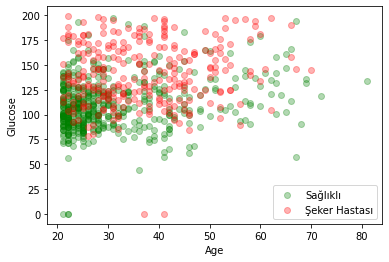

In [11]:
plt.scatter(sağlıklı.Age,sağlıklı.Glucose,color='green',label='Sağlıklı',alpha=0.3)
plt.scatter(seker_hastaları.Age,seker_hastaları.Glucose,color='red',label='Şeker Hastası',alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [17]:
#X ve Y eksenlerini belirtiyorum
y=df.Outcome.values
x_ham_veri=df.drop('Outcome',axis=1)

In [22]:
#Normalizasyon yapıyorum eğer yapmaz isem büyük veriler küçük verileri ezer
x=(x_ham_veri-np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

#Normalizasyondan önce veriler;
print(x_ham_veri.head())
print("Normalizasyon sonrası")
#Normalizasyondan sonraki veriler;
print(x.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Normalizasyon sonrası
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.44723

C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [36]:
#Train data ve test datasını ayırmam gerek 
#Train datası sağlıklı ve seker hastası olan insanların verilerini öğrenmek için kullanılacak
#Test datası ise doğruluk oranını görmek için kullanılacak


#veriyi Test ve Train olarak 2 ye bölüyorum
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=1)

#Knn Modeline Baslıyorum
knn=KNeighborsClassifier(n_neighbors=7) #N=K'nın kaç oldugu (k dediği çember genişliği)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

print("verilerimizin doğruluk oranı = ",knn.score(x_test,y_test))


verilerimizin doğruluk oranı =  0.7284552845528456


C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [38]:
#En iyi K değerini bulmak için şöyle bir algoritma da kullanabilirim
sayac=1

for i in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=i)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk Oranı : %",knn_yeni.score(x_test,y_test)*100)
    sayac+=1

C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

1   Doğruluk Oranı : % 68.29268292682927
2   Doğruluk Oranı : % 69.7560975609756
3   Doğruluk Oranı : % 70.89430894308944
4   Doğruluk Oranı : % 71.21951219512195
5   Doğruluk Oranı : % 71.0569105691057
6   Doğruluk Oranı : % 71.869918699187
7   Doğruluk Oranı : % 72.84552845528455
8   Doğruluk Oranı : % 73.4959349593496
9   Doğruluk Oranı : % 73.65853658536585
10   Doğruluk Oranı : % 73.8211382113821


C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

##### Modeli Kurduk şimdi de girilen veriler ile kişinin hasta olup olmadığını anlama zamanı

In [39]:
liste=[[2,87,58,26,16,28.4,0.766,22],
      [0,122,72,1,1,36.3,0.258,52]]

x_yeni_kisi_ham_veri=pd.DataFrame(liste,columns=x_ham_veri.columns)
x_yeni_kisi_normalize_edilmis_veri=(x_yeni_kisi_ham_veri-np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

prediction_yeni_kisi=knn.predict(x_yeni_kisi_normalize_edilmis_veri)

print(prediction_yeni_kisi)

[0 0]


C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\r_oru\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will beco

In [40]:
#Modele Göre girilen 2 kişi de şeker hastası değil 